# <center>9. Закрепление знаний

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import plotly
import plotly.express as px

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#выведем информацию о таблице
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Столбцы таблицы:

1. RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
2. CustomerId — идентификатор клиента
3. Surname — фамилия клиента
4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
5. Geography — страна клиента (банк международный)
6. Gender — пол клиента
7. Age — возраст клиента
8. Tenure — сколько лет клиент пользуется услугами банка
9. Balance — баланс на счетах клиента в банке
10. NumOfProducts — количество услуг банка, которые приобрёл клиент
11. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
12. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
13. EstimatedSalary — предполагаемая заработная плата клиента
14. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [4]:
#удалим RowNumber - это лишняя информация, от нее можно сразу избавиться
churn_data = churn_data.drop(['RowNumber'], axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
copied_df = churn_data.copy()

Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента.

### <center>9.1. Каково соотношение ушедших и лояльных клиентов?

In [7]:
# Построим круговую диаграмму в Plotly
# задаём имена значениям
churn_data['exited_status'] = churn_data['Exited'].map({0:'Лояльные клиенты', 1:'Ушедшие клиенты'})
# создаем круговую диграмму
fig = px.pie(
    data_frame=churn_data,
    names='exited_status',
    title='Соотношение ушедших и лояльных клиентов',
    width=550,
    height=550,
    )
fig.show()
fig.write_html("plotly/churn_status.html")
fig.write_image("plotly/churn_status.png")

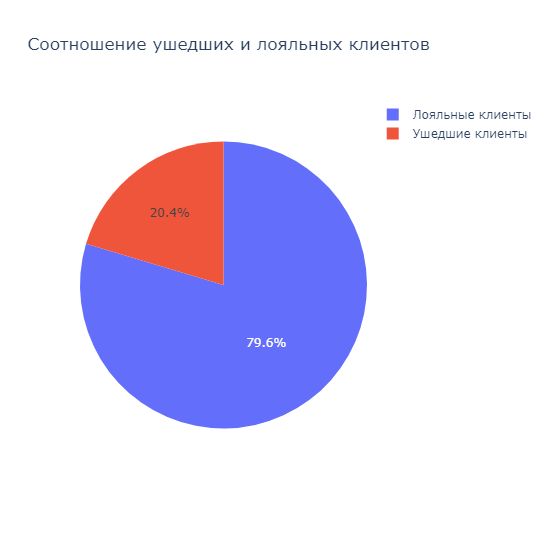

In [8]:
from IPython.display import Image
Image("plotly/churn_status.png")

Вывод:
На диаграмме мы видим два элемента: лояльные клиенты и ушедшие клиенты.
В процентном соотношении ушедших клиентов 20.4%, что составляет 1/5 от общего числа клиентов.
Это не кретично для банка, но показатель надо уменьшать, возможно введением бонусов для новых клиентов или увеличением процентной ставки.

### <center>9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.

Распределение удобнее показать с помощью гистограммы, еще можно использовать "ящик с усами".

In [9]:
# Построим гистограмму в Plotly
# Зададим переменную для фильтрации клиентов согласно условию >2 500$
filter_balance = churn_data.Balance > 2500
churn_df_filter = churn_data[filter_balance]
# построим график распределения баланса пользователей
fig = px.histogram(
    data_frame = churn_df_filter, # датафрейм
    x='Balance', # ось абсцисс
    color='exited_status', # расцветка в зависимости от статуса клиента
    width=1100,
    height=700, 
    title='Распределение баланса пользователей'
)
fig.show()
fig.write_html("plotly/churn_Balance.html")
fig.write_image("plotly/churn_Balance.png")

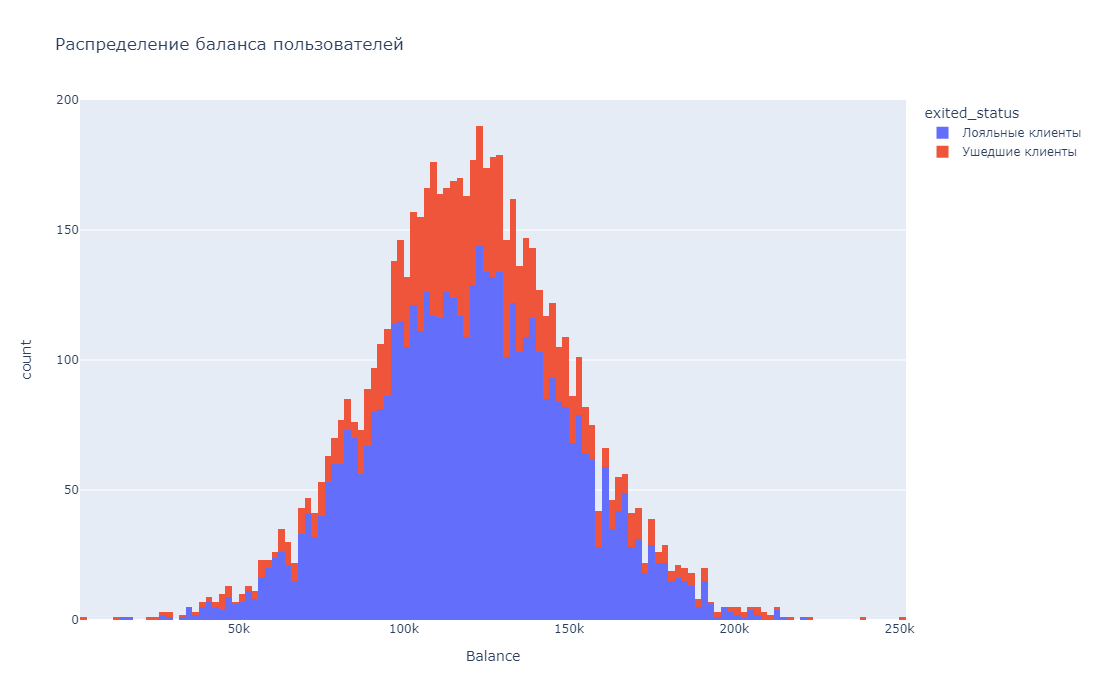

In [10]:
from IPython.display import Image
Image("plotly/churn_Balance.png")

In [11]:
fig = px.box(churn_df_filter,
             x="Balance",
             title='Распределение баланса пользователей, у которых на счету больше 2 500 $'
            )
fig.show()
fig.write_html("plotly/churn_Balance_box.html")
fig.write_image("plotly/churn_Balance_box.png")

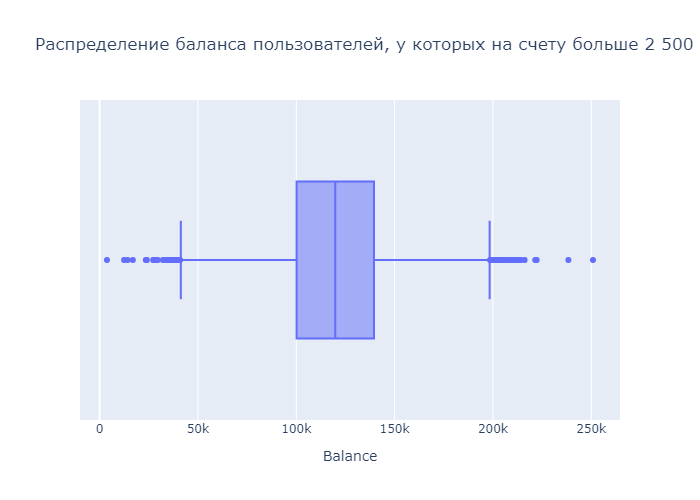

In [12]:
from IPython.display import Image
Image("plotly/churn_Balance_box.png")

Вывод:
В основном у клиентов (с балансом > 2500 $ на счёте) баланс составляет от 41 до 198 тыс.дол., 50 % таких клиентов имеют на счёте от 100 до 140 тыс. дол., наибольшее количество в этой группе - около 2200 клиентов имеют на счёте 120 тыс.дол. - медианное значение. 
За границами "усов" имеются выбросы - нижние до 3.7 тыс.дол. и верхние до 250.9 тыс.дол. 
Значения относительно медианы распределены симметричо.

### <center>9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?

In [13]:
copied_df['Loyalty'] = copied_df['Exited'].apply(lambda x: 'loyal' if x==0 else 'lost')
fig = px.box(
    data_frame=copied_df,
    x='Balance',
    y='Loyalty',
    orientation='h',
    color='Loyalty',
    title='Распределение баланса клиента в разрезе признака оттока'   
)
fig.layout.xaxis.title.text = 'Баланс'
fig.layout.yaxis.title.text = 'Статус лояльности'
fig.show()
fig.write_html("plotly/Balance_Loyalty.html")
fig.write_image("plotly/Balance_Loyalty.png")

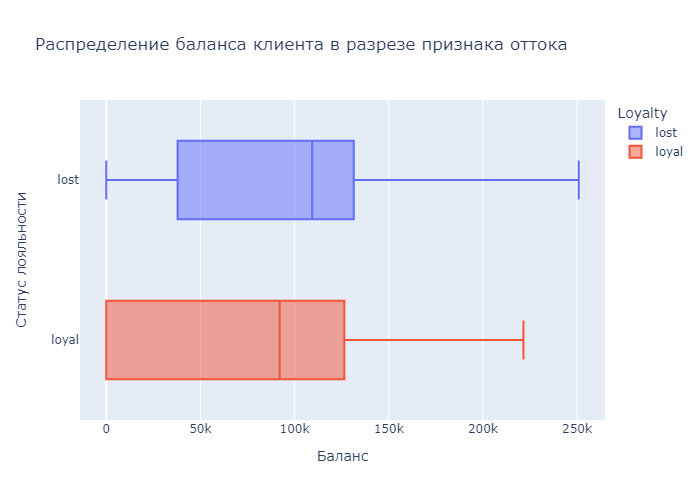

In [14]:
from IPython.display import Image
Image("plotly/Balance_Loyalty.png")

Вывод:
График покаывает что счета с нулевым балансом есть в обеих группах клиентов, границы баланса :
лояльных 0-221.5 тыс.дол., медиана 92 тыс.дол. (0-92 тыс.дол - 50% всех клиентов, 92-126 тыс.дол.-25%, 126-221.5 тыс.дол - 25%),
ушедших 0-251 тыс.дол., медиана 109 тыс.дол. (0-38 тыс.дол - 25%, 38-109 тыс.дол.-25%,109-131 тыс.дол - 25%, 131-251 тыс.дол - 25%).
Т.е. ушла четвертая часть клиентов, со значительными балансами на счетах. Возможно политика банка перестала устраивать более состоятельных, их перестал устраивать уровень безопасности и они стали боятся потерять свои вклады.

### <center>9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [15]:
fig = px.box(
    data_frame=copied_df,
    x='Age',
    y='Loyalty',
    orientation='h',
    color='Loyalty',
    title='Распределение возраста в разрезе признака оттока '   
)
fig.layout.xaxis.title.text = 'Возрастная категория клиентов'
fig.layout.yaxis.title.text = 'Статус лояльности'
fig.show()
fig.write_html("plotly/Age_Loyalty.html")
fig.write_image("plotly/Age_Loyalty.png")


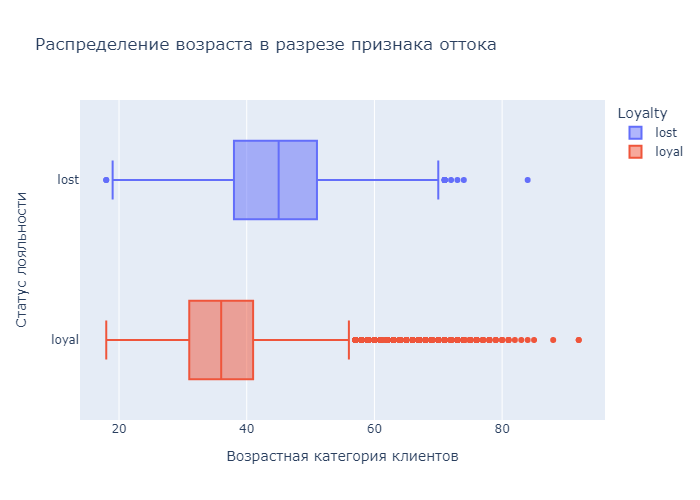

In [16]:
from IPython.display import Image
Image("plotly/Age_Loyalty.png")

Вывод:
Возраст лояльных клиентов 17-56 лет, 50% этой группы - 31-41 год, медианное значение возраста 36 лет. За верхней границей очень много выбросов - до 93 лет.
Возраст ушедших клиентов - 18-70 лет, есть единичные выбросы за границами. 50% ушедших клиентов в возрасте - 37-51 год, 45 лет - медианное значение возраста.
**Возможно банку следует обратить внимание на клиентов из возрастной группы - 37-51 год (С балансом на счетах от 38 до 132 тыс.дол.).**

### <center>9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками?

In [17]:
# Построим диаграмму рассеяния в Plotly
# задаём имена значениям
copied_df['Loyalty'] = copied_df['Exited'].apply(lambda x: 'loyal' if x==0 else 'lost')
# строим график
fig = px.scatter(
    data_frame = copied_df, #датафрейм
    x='EstimatedSalary', #ось абсцисс
    y='CreditScore', #ось ординат
    color='Loyalty', #расцветка в зависимости от статуса клиента
    width=1100,
    height=700, 
    title='Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты в разрезе признака оттока клиентов'
)
fig.layout.xaxis.title.text = 'Размер предполагаемой зарплаты'
fig.layout.yaxis.title.text = 'Кредитный рейтинг'
fig.show()
fig.write_html("plotly/churn_credit.html")
fig.write_image("plotly/churn_credit.png")

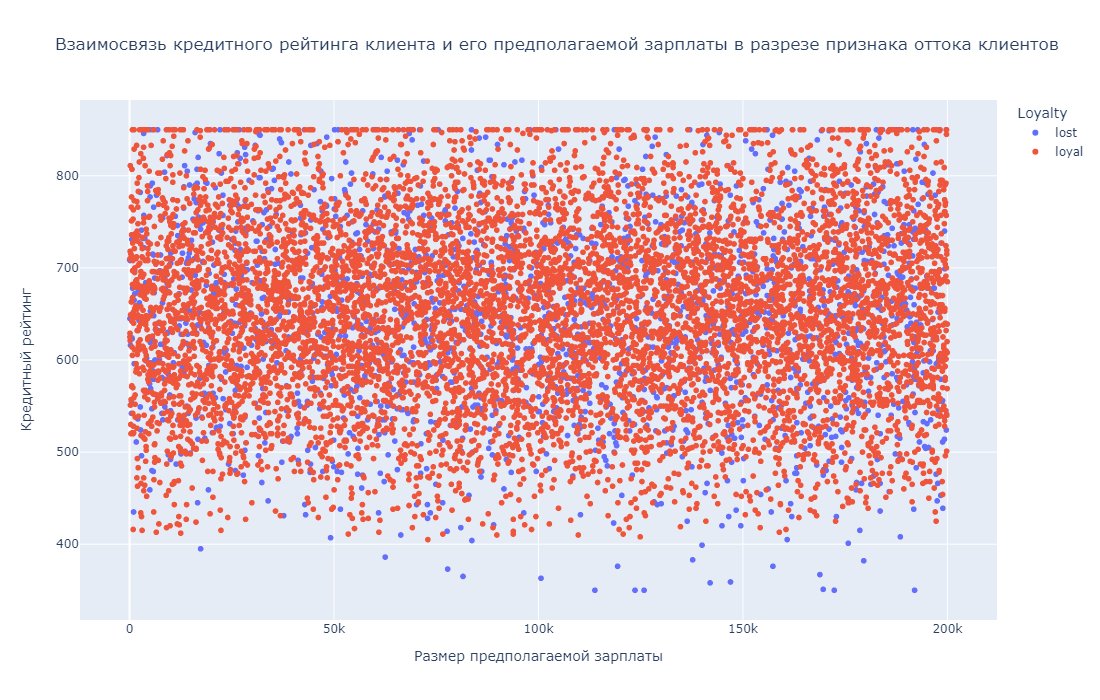

In [18]:
from IPython.display import Image
Image("plotly/churn_credit.png")

Вывод:
Из данного графика мы видим - что плотность распределения точек всех цветов на графике равномерная. То есть люди имеют высокий кредитный лимит как с маленькой зарплатой так и с большой, и так же низкий кредитный лимит - с маленькой зарплатой и с большой. 
Распределение кредитного рейтинга относительно предполагаемой зарплаты носит равномерный характер, зависимости не прослеживается ни у лояльных, ни у ушедших клиентов банка.

### <center>9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка:
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

In [19]:
GendEx = churn_data.groupby('Gender')['Exited'].mean()  # это "подсказка"
fig = px.pie(GendEx,
             names=GendEx.index,
             values=GendEx.values,
             title='Соотношение в % ушедших мужчин и женщин',
             width=550,
             height=550,
             )
fig.show()
fig.write_html("plotly/Gender_Loyalty.html")
fig.write_image("plotly/Gender_Loyalty.png")

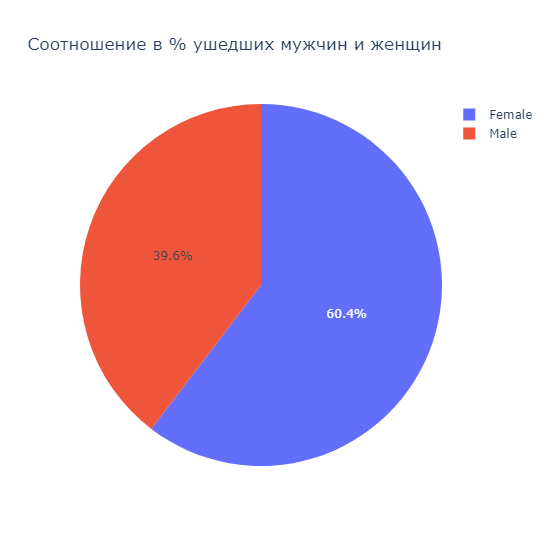

In [20]:
from IPython.display import Image
Image("plotly/Gender_Loyalty.png")

Вывод:
На данном графике можно увидеть, что среди ушедших клиентов больше женщин.

### <center>9.7. Как отток клиентов зависит от числа приобретённых у банка услуг?

In [21]:
#задаем переменную для построения диаграммы
copied_df['Loyalty'] = copied_df['Exited'].apply(lambda x: 'loyal' if x==0 else 'lost')
group_bar = copied_df.groupby('NumOfProducts')['Exited'].agg(['sum', 'count']).reset_index()
group_bar.rename(columns={'sum': 'lost'}, inplace=True)
group_bar['loyal'] = group_bar['count'] - group_bar['lost']
group_bar.drop('count', axis=1, inplace=True)
#строим многоуровневую столбчатую диаграмму зависимости оттока клиентов от числа приобретенных услуг
fig = px.bar(
    data_frame=group_bar,
    x='NumOfProducts',
    y=['loyal', 'lost'],
    barmode='group',
    height=500,
    width=900,
    title='Зависимость оттока клиентов от числа приобретенных услуг'
)
fig.layout.xaxis.title = 'Количество услуг банка'
fig.layout.yaxis.title = 'Количество клиентов'
fig.layout.legend.title = None
fig.show()
fig.write_html("plotly/NumOfProducts.html")
fig.write_image("plotly/NumOfProducts.png")

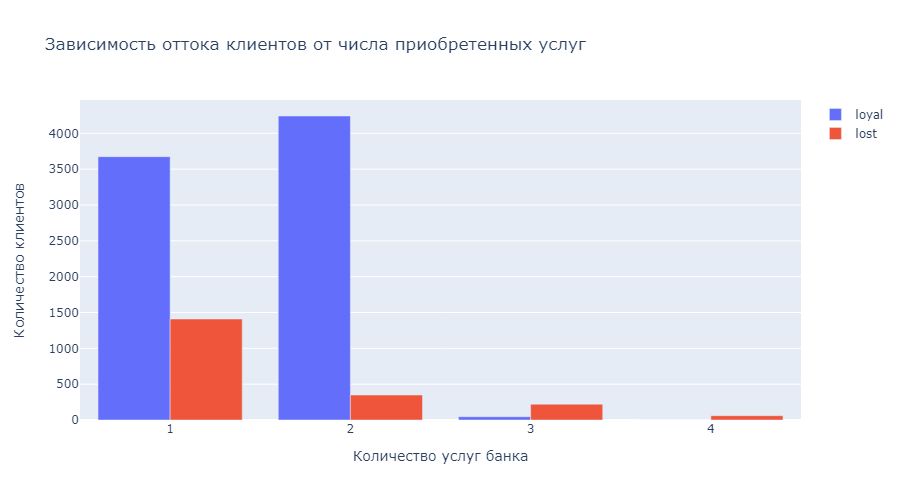

In [22]:
from IPython.display import Image
Image("plotly/NumOfProducts.png")

Вывод:
На полученной диаграмме видно, что максимальное количесвто приобретенных услуг было у ушедших клиентов (2 и 3 услуги). 
Большая часть ушедших клиентов приобретала одну услугу банка. Лояльные клиенты используют одну или две услуги банка.
**Можно сделать вывод об имеющихся недостатках в предоставляемых услугах и их качестве.**

### <center>9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [23]:
active_member_loyalty = copied_df.groupby('IsActiveMember')['Exited'].agg(['sum', 'count']).reset_index()
active_member_loyalty.rename(columns={'sum': 'lost'}, inplace=True)
active_member_loyalty['loyal'] = active_member_loyalty['count'] - active_member_loyalty['lost']
active_member_loyalty.drop('count', axis=1, inplace=True)
active_member_loyalty.loc[0, 'IsActiveMember'] = 'inactive'
active_member_loyalty.loc[1, 'IsActiveMember'] = 'active'

fig = px.bar(active_member_loyalty, 
             x="IsActiveMember", 
             y=["loyal", "lost"],
             barmode='group',
             title='Влияние наличия статуса активного клиента на отток',
             width=700,
             height=500
)
fig.layout.xaxis.title = None
fig.layout.yaxis.title = 'Количество клиентов'
fig.layout.legend.title = None
fig.show()
fig.write_html("plotly/active_member_loyalty.html")
fig.write_image("plotly/active_member_loyalty.png")

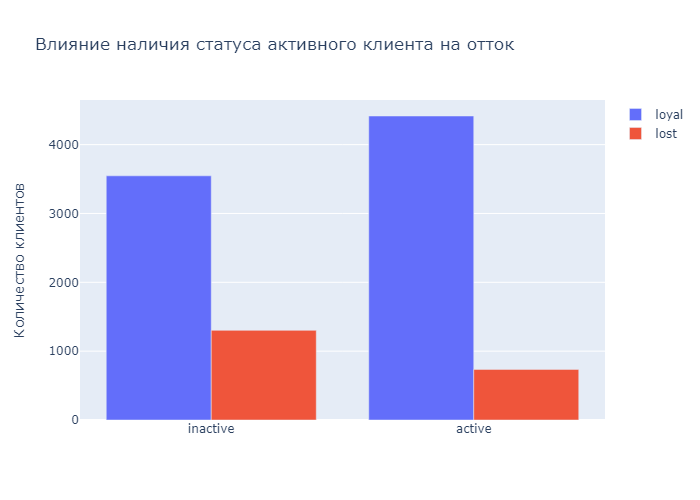

In [24]:
from IPython.display import Image
Image("plotly/active_member_loyalty.png")

Вывод:
Из выше предоставленной диграммы становится понятно, что статус активного клиента вляет на отток следующим образом: среди активных клиентов число ушедших меньше, чем среди клиентов без статуса активный. Следует пересммотреть условия или программу лояльности для клиентов без наличия статуса активный. Можно предложить банку развивать доп. сервисы - введение различных бонусов за операции по карте: кэшбэк, процент на остаток по расчетному счету, бонусы на приобретение услуг у партнеров, - а также развитием сервиса по проведению различных платежей - страховки, билеты, переводы, оплаьа услуг ЖКХ без комиссии, предоставлением удобного доступа к различным финансовым инструментам (инвестиции).

### <center>9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира.

In [25]:
country_loyalty = copied_df.groupby('Geography', as_index=False)['Exited'].mean()
country_loyalty['Lost rate, %'] = country_loyalty['Exited'] * 100

fig = px.choropleth(
    data_frame=country_loyalty, 
    locations="Geography", 
    locationmode = "country names", 
    color="Lost rate, %", 
    range_color=[0, 40],
    title='Распределение оттока клиентов по странам', 
    scope='europe',
    fitbounds='locations',
    width=800, 
    height=800,
    color_continuous_scale='Greens'
)
fig.show()
fig.write_html("plotly/country_loyalty.html")
fig.write_image("plotly/country_loyalty.png")


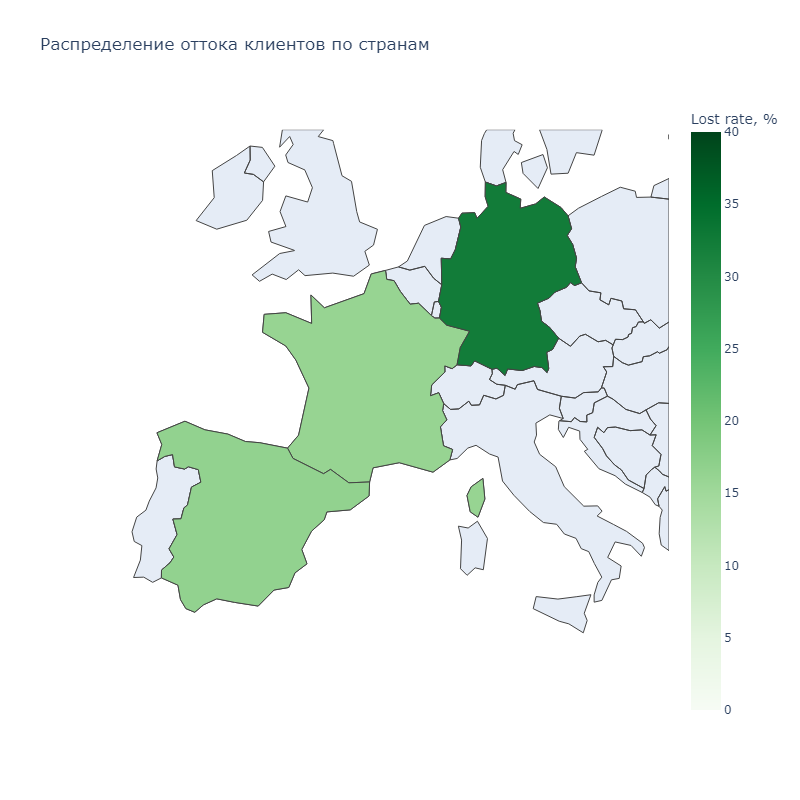

In [26]:
from IPython.display import Image
Image("plotly/country_loyalty.png")

Вывод:
Наибольший отток клиентов в Германии: более 30%. Возможно в Германии есть большая конкуренция, другие банки предлагают более выгодные условия.

### <center>9.10.Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [27]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
copied_df['CreditScoreCat'] = copied_df['CreditScore'].apply(get_credit_score_cat)
copied_df['CreditScoreCat'].value_counts()


Good         3703
Poor         2434
Fair         2281
Excellent     950
Very_Poor     632
Name: CreditScoreCat, dtype: int64

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

In [28]:
credit_score_cat_loyalty = copied_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
)
credit_score_cat_loyalty = (credit_score_cat_loyalty * 100).round(1)
fig = px.imshow(
    credit_score_cat_loyalty, 
    text_auto=True,
    title='Тепловая карта категории клиентов в зависимости от кредитного рейтинга и клиентского стажа',
    labels=dict(x='Стаж клиента в банке, лет', y='Категория кредитного рейтинга', color='Lost share %')
)

fig.show()
fig.write_html("plotly/credit_score_cat_loyalty.html")
fig.write_image("plotly/credit_score_cat_loyalty.png")


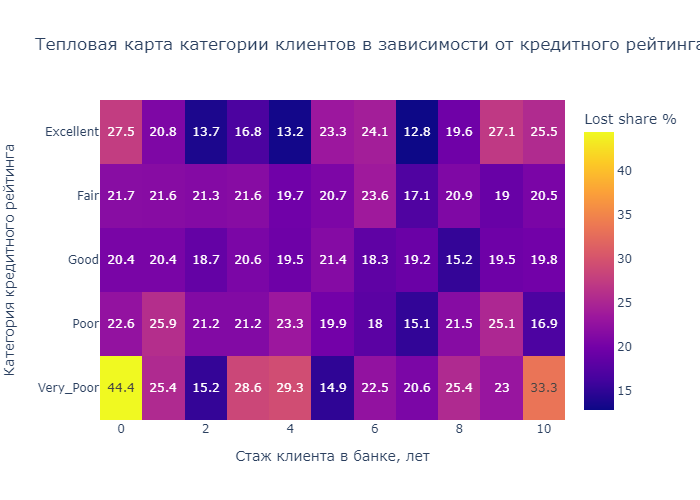

In [29]:
from IPython.display import Image
Image("plotly/credit_score_cat_loyalty.png")

Вывод:
Чаще всего банк покидают новые клиенты с низким кредитным рейтингом 0 лет. Следующими по частоте банк покидают клиенты со средним сроком обслуживания 4 года и наибольшим 10 лет, и так же с низким кредитным рейтингом. Также довольно большой отток у клиентов с прекрасным рейтингом и стажем 0 или 9 лет. Можно заметить, что отток более "стабилен" по годам для средних показателей рейтинга, в то время как у клиентов с очень плохим или наоборот, прекрасным рейтингом отток резко колеблется от минимума к максимуму в зависимости от количества лет.


**Итог:**
**Четвёртая часть клиентов со значительными балансами на счетах(38-131 тыс.дол), возраст 38-51 год, большинство из них - женщины. Большая часть ушедшх клиентов из Германии. Также в основном приобретали 1 услугу, имели неактивный статус. Пользовались банком первый год или 9 и более лет с очень низким и самым высоким кредитным рейтингом, также на 3-4 год при низком кредитном рейтинге.** 
**Это может указывать на недостатки клиентского сервиса, качество, условия предоставления продуктов и услуг банка, отсутствием поощрений за долгосрочное сотрудничество, ориентированность на привлечение новых клиентов, отсутствием достаточного внимания к запросам уже имеющихся клиентов, отсутствие развития новых направлений банкинга.**